In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 0.60847 #0.67545739

In [9]:
#np.round(0.67545739-((1+0.67545739)*0.06/3e+5), 8)

# CIV

## CIV 1548

In [11]:
civ_1548_stis = ion_transition('CIV', 1548, 'C', z_sys, 'STIS')

In [12]:
civ_1548_stis.grab_ion_transition_info()

In [13]:
civ_1548_stis.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[20,200]])

In [14]:
civ_1548_stis.cont_norm_flux(v_abs_range=[-50,200], degree=1)

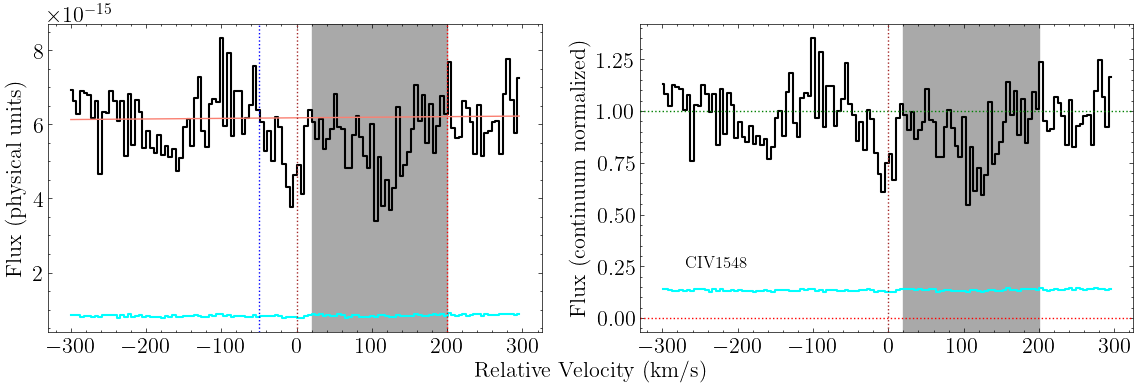

In [15]:
fig, ax = civ_1548_stis.plot_ion_transition_spec_cont()

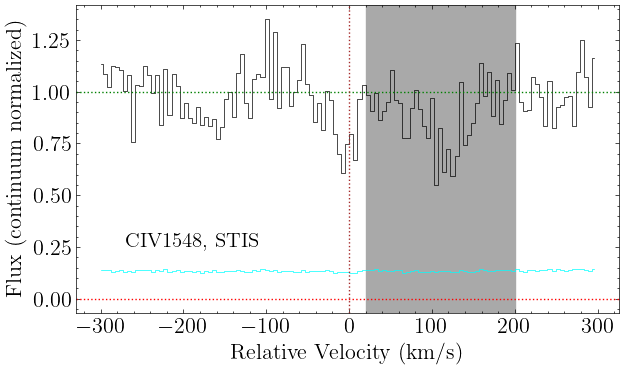

In [16]:
fig, ax = civ_1548_stis.plot_ion_transition_spec()

In [17]:
civ_1548_stis.get_EW_total(-50,50)

Integration window: [-50, 50]
EW, 1sig: 62, 15
EW-3sig: 44.115


In [18]:
civ_1548_stis.grab_ion_transition_lsf(lsf_fits_list)

In [19]:
civ_1548_stis.init_ion_transition(init_values = np.array([[13.0,17.7, 0]]), 
                             lsf_convolve = True)

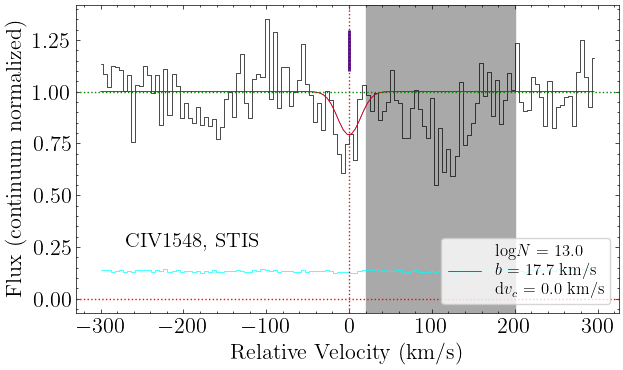

In [20]:
fig, ax = civ_1548_stis.plot_ion_transition_init_fit()

In [21]:
civ_1548_stis.fit_ion_transition()

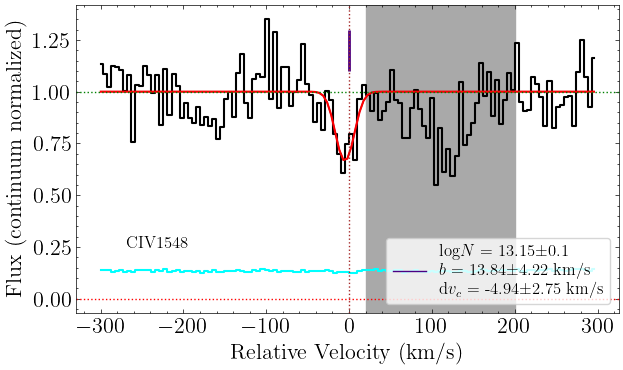

In [22]:
fig, ax = civ_1548_stis.plot_ion_transition_best_fit()

## CIV 1550

In [23]:
civ_1550_stis = ion_transition('CIV', 1550, 'C', z_sys, 'STIS')

In [24]:
civ_1550_stis.grab_ion_transition_info()

In [25]:
civ_1550_stis.grab_ion_transition_spec(spec_fits_list)#, masks=[[-500,-300]])

In [26]:
civ_1550_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

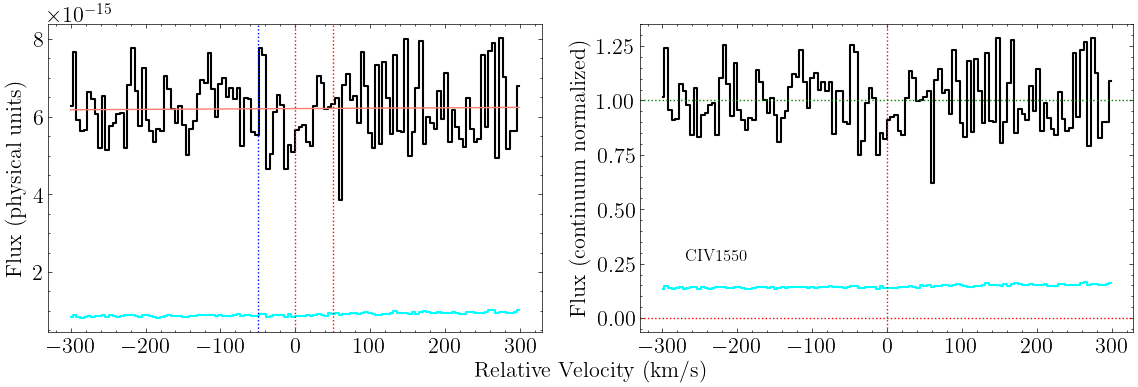

In [27]:
fig, ax = civ_1550_stis.plot_ion_transition_spec_cont()

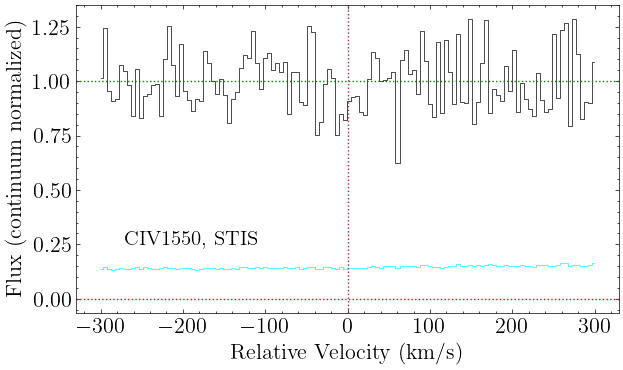

In [28]:
fig, ax = civ_1550_stis.plot_ion_transition_spec()

In [29]:
civ_1550_stis.get_EW_total(-50,50)

Integration window: [-50, 50]
EW, 1sig: 19, 16
EW-3sig: 46.820


In [30]:
civ_1550_stis.grab_ion_transition_lsf(lsf_fits_list)

In [31]:
civ_1550_stis.init_ion_transition(init_values = np.array([[13.2,14,-5]]), 
                             lsf_convolve = True)

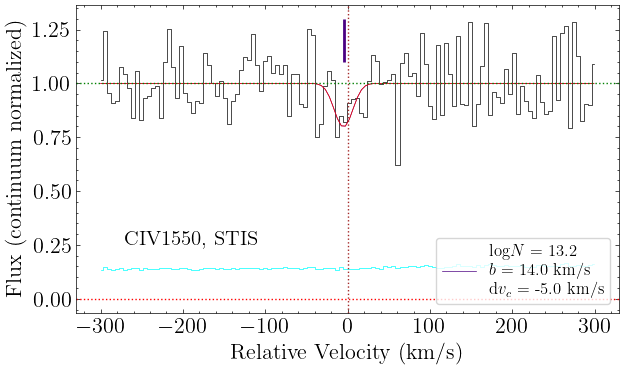

In [32]:
fig, ax = civ_1550_stis.plot_ion_transition_init_fit()

In [33]:
civ_1550_stis.fit_ion_transition()

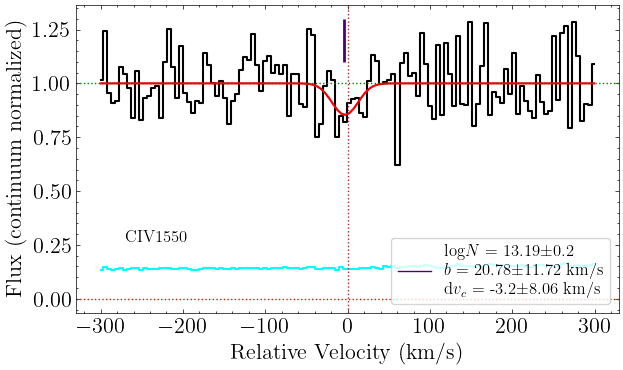

In [34]:
fig, ax = civ_1550_stis.plot_ion_transition_best_fit()

## CIV ion

In [37]:
civ = ion(z_sys, 'CIV', [civ_1548_stis, civ_1550_stis])

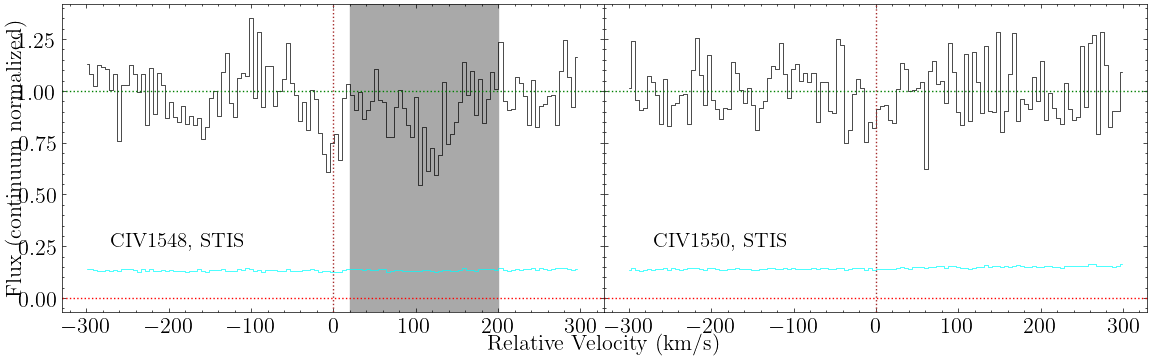

In [38]:
fig, axes = civ.plot_ion()

In [39]:
civ.init_ion([[[13.2, 14, -5]],
             [[13.2, 14, -5]]])

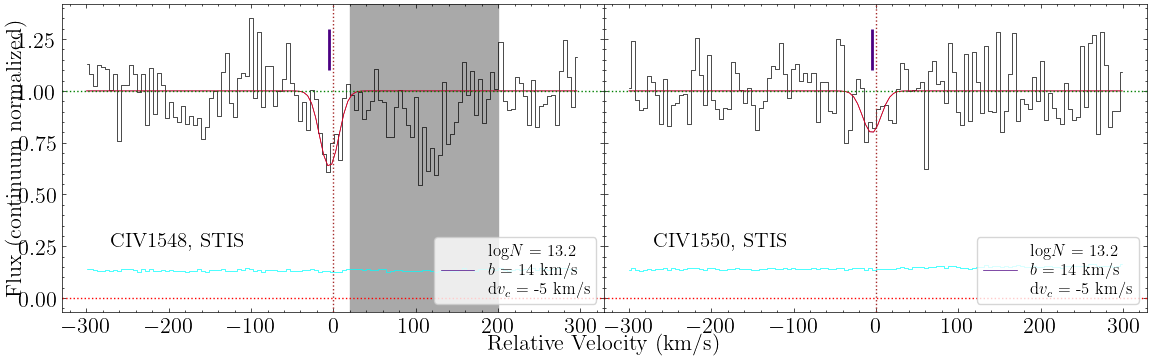

In [40]:
fig, axes = civ.plot_ion_init_fit()

In [41]:
civ.fit_ion(tie_params_list=[['it1c1_logN','it2c1_logN'],
                             ['it1c1_b','it2c1_b'], 
                             ['it1c1_dv_c','it2c1_dv_c']])

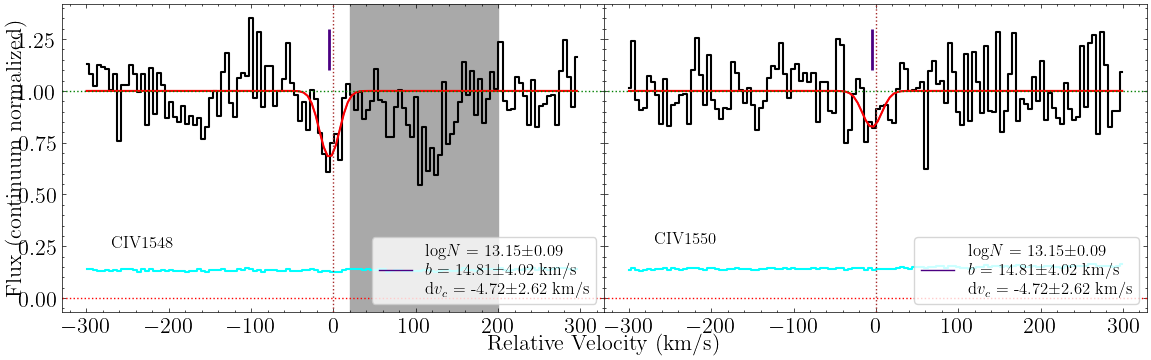

In [42]:
fig, axes = civ.plot_ion_best_fit()

In [43]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=100, n_steps=2500)
#civ.fit_ion_emcee(load=True, loaddir=rootdir)

In [44]:
#fig, axes = civ.plot_samples()

In [45]:
#civ.plot_corner()

# CIII

## CIII 977

In [46]:
ciii_977_fuv = ion_transition('CIII', 977, 'C', z_sys, 'FUV')

In [47]:
ciii_977_fuv.grab_ion_transition_info()

In [48]:
ciii_977_fuv.grab_ion_transition_spec(spec_fits_list)

In [49]:
ciii_977_fuv.cont_norm_flux(v_abs_range=[-80,100], degree=1)

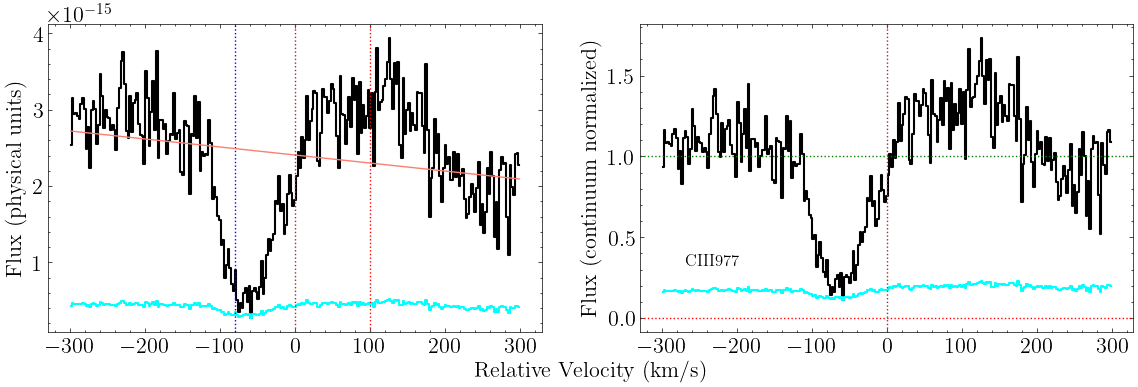

In [50]:
fig, axes = ciii_977_fuv.plot_ion_transition_spec_cont()

# OIV

## OIV 787
Get OIV 787 from COS FUV

In [51]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [52]:
oiv_787_fuv.grab_ion_transition_info(delta_v=6)

In [53]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-250,-85]])

In [54]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-85,85], degree=1)

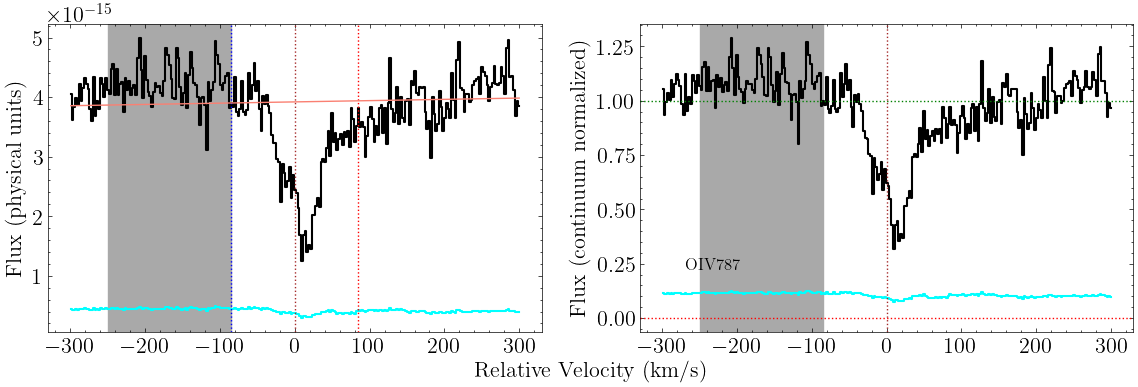

In [55]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

# OIII

## OIII 832
Get OIII 832 from COS FUV

In [60]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys, 'FUV')

In [61]:
oiii_832_fuv.grab_ion_transition_info()

In [62]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-220],[40,145]])

In [63]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-70,70], degree=1)

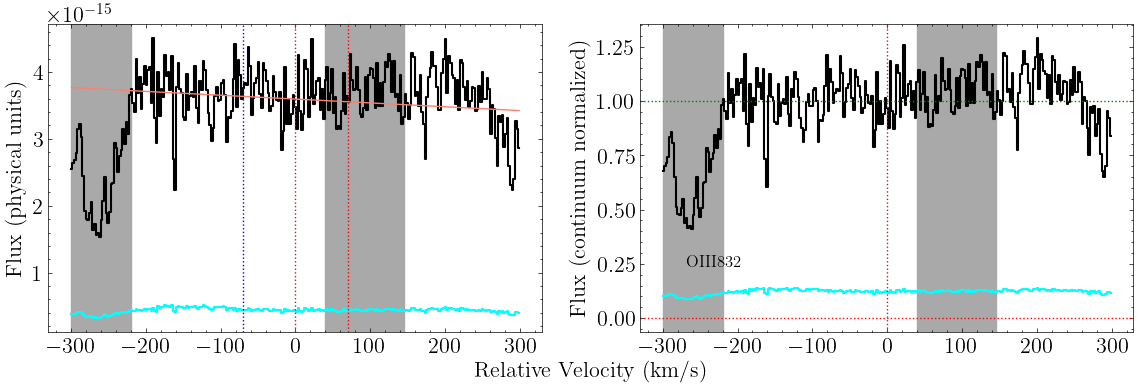

In [64]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

# HI

## HI 1025

In [74]:
hi_1025_fuv = ion_transition('HI', 1025, 'H', z_sys, 'FUV')

In [75]:
hi_1025_fuv.grab_ion_transition_info()

In [76]:
hi_1025_fuv.grab_ion_transition_spec(spec_fits_list)

In [77]:
hi_1025_fuv.cont_norm_flux(renorm=True, v_abs_range=[-200,120], degree=1)

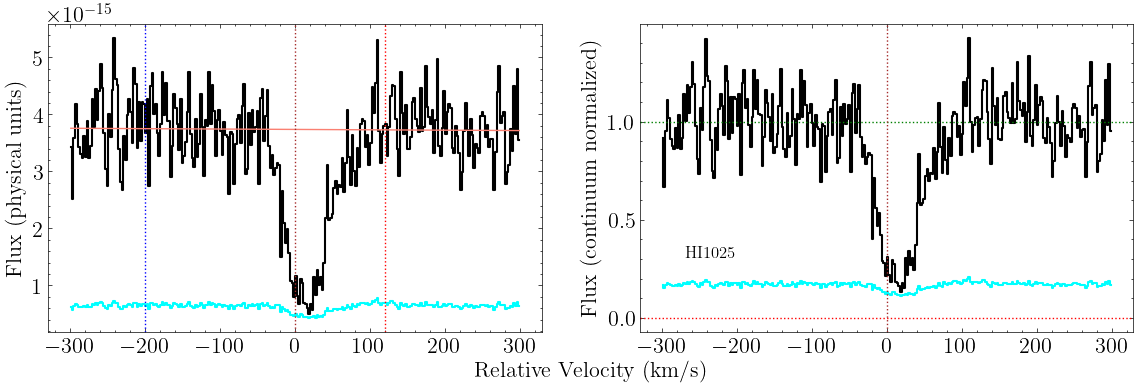

In [78]:
fig, axes = hi_1025_fuv.plot_ion_transition_spec_cont()

In [99]:
hi_1025_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [100]:
hi_1025_fuv.init_ion_transition(init_values = [[15.4, 35, 0], [15.6, 25, -30]], 
                             lsf_convolve = True)

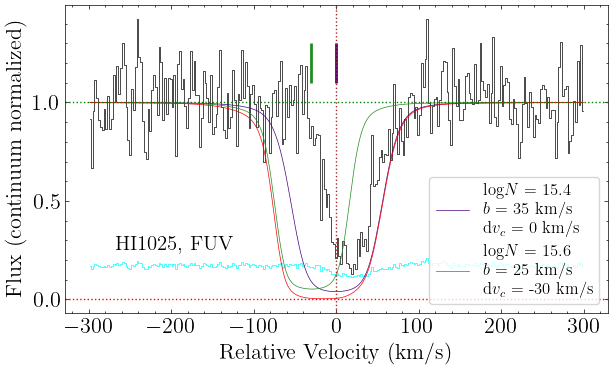

In [101]:
fig, ax = hi_1025_fuv.plot_ion_transition_init_fit()

In [102]:
hi_1025_fuv.fit_ion_transition()

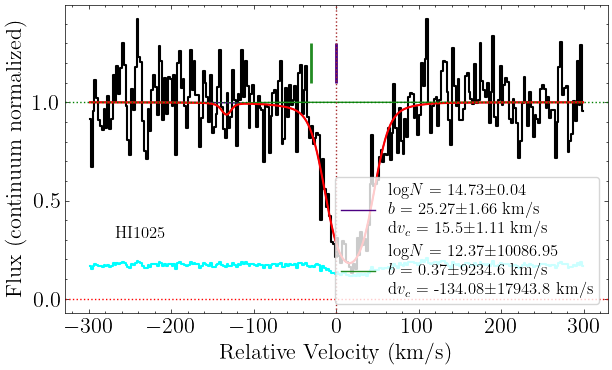

In [103]:
fig, ax = hi_1025_fuv.plot_ion_transition_best_fit()

## HI 972
Get HI 972 from COS FUV

In [104]:
hi_972_fuv = ion_transition('HI', 972, 'H', z_sys, 'FUV')

In [105]:
hi_972_fuv.grab_ion_transition_info()

In [106]:
hi_972_fuv.grab_ion_transition_spec(spec_fits_list)

In [107]:
hi_972_fuv.cont_norm_flux(renorm=True, v_abs_range=[-110,80], degree=1)

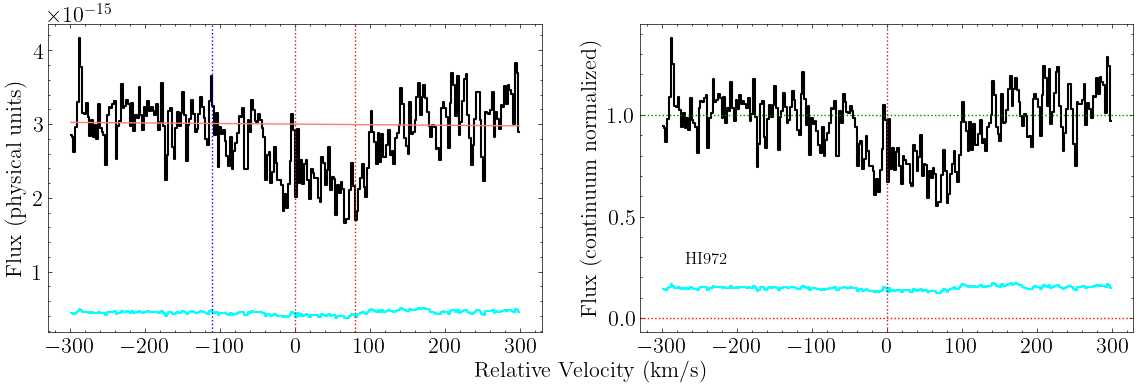

In [108]:
fig, axes = hi_972_fuv.plot_ion_transition_spec_cont()

In [109]:
hi_972_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [110]:
hi_972_fuv.init_ion_transition(init_values = [[14.7, 25, 15]],
                             lsf_convolve = True)

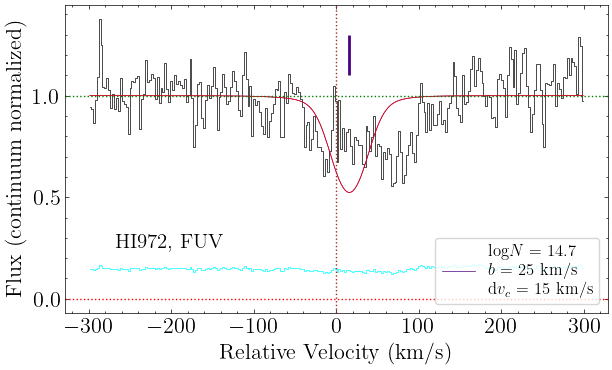

In [111]:
fig, ax = hi_972_fuv.plot_ion_transition_init_fit()

## HI 949
Get HI 949 from COS FUV

In [84]:
hi_949_fuv = ion_transition('HI', 949, 'H', z_sys, 'FUV')

In [85]:
hi_949_fuv.grab_ion_transition_info()

In [86]:
hi_949_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-260],[100,280]])

In [87]:
hi_949_fuv.cont_norm_flux(v_abs_range=[-110,90], degree=1)

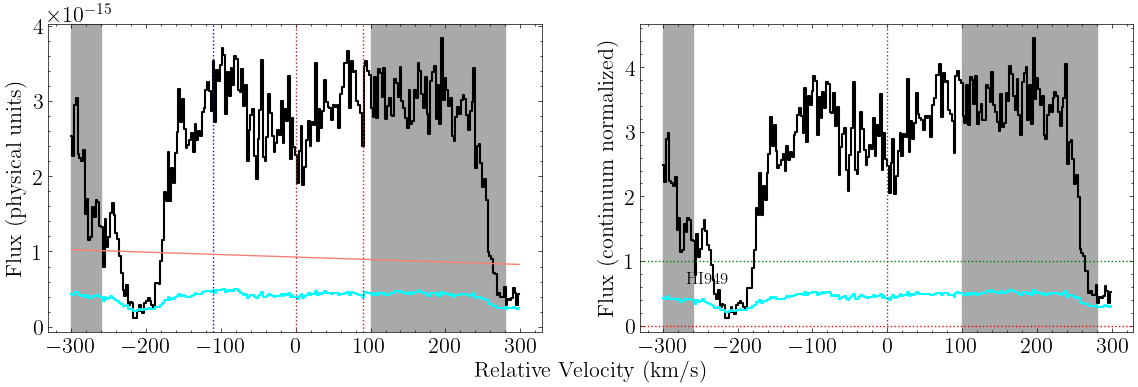

In [88]:
fig, axes = hi_949_fuv.plot_ion_transition_spec_cont()

# OVI

## OVI 1031
Get OVI 1031 from COS FUV

In [89]:
ovi_1031_fuv = ion_transition('OVI', 1031, 'O', z_sys, 'FUV')

In [90]:
ovi_1031_fuv.grab_ion_transition_info(delta_v = 14.5)

In [91]:
ovi_1031_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120],[180,290]])

In [92]:
ovi_1031_fuv.cont_norm_flux(v_abs_range=[-85,85], degree=1)

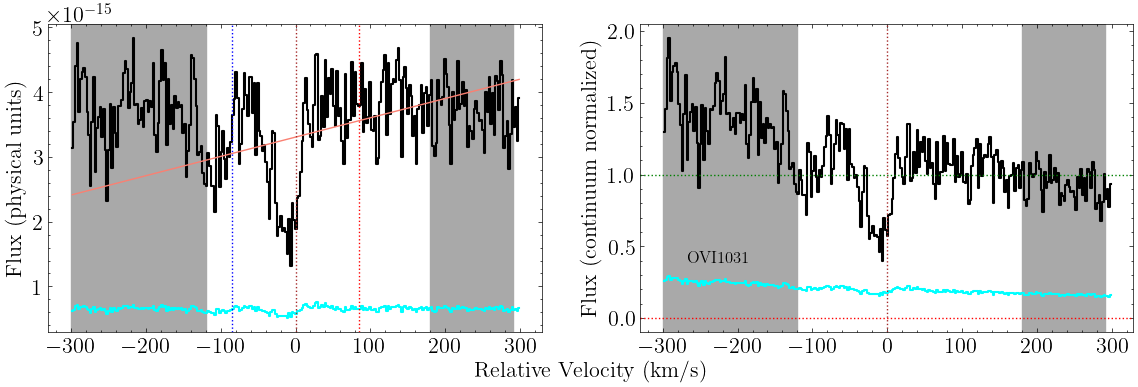

In [93]:
fig, ax = ovi_1031_fuv.plot_ion_transition_spec_cont()

## OVI 1037
Get OVI 1037 from COS FUV

In [94]:
ovi_1037_fuv = ion_transition('OVI', 1037, 'O', z_sys, 'FUV')

In [95]:
ovi_1037_fuv.grab_ion_transition_info(delta_v = 14.5)

In [96]:
ovi_1037_fuv.grab_ion_transition_spec(spec_fits_list,  masks=[[35,130],[260,300]])

In [97]:
ovi_1037_fuv.cont_norm_flux(v_abs_range=[-75,75], degree=1)

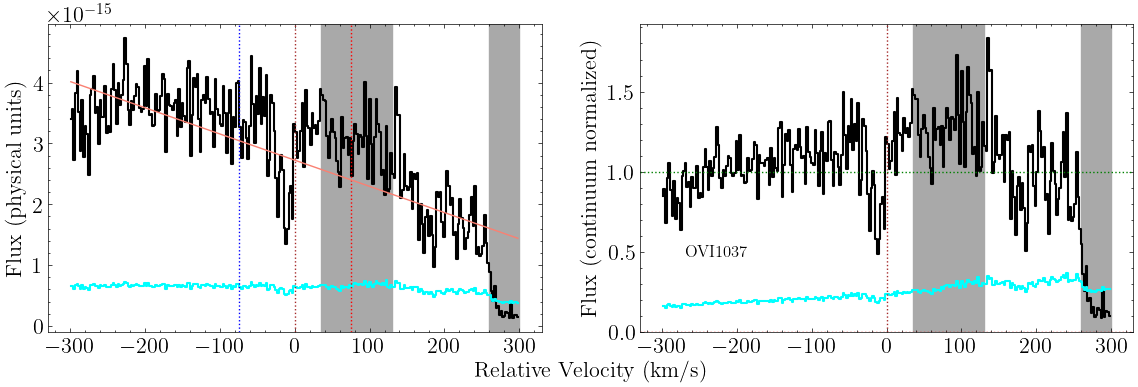

In [98]:
fig, ax = ovi_1037_fuv.plot_ion_transition_spec_cont()